In [8]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [9]:
working_dir = "/Users/filippo/Developer/tesi"
os.chdir(working_dir)
dirs = os.listdir("data")

In [10]:
samples = pd.read_csv("files.txt", index_col=[0])
samples.head()

,primary_site,disease_type
85593c7d-7441-4d41-81d3-aaa17c7e398b,Stomach,Adenomas and Adenocarcinomas
bfeaa9f7-e413-40b8-86ba-c9d26a96c240,Cervix uteri,Squamous Cell Neoplasms
426b94fe-fcff-49f2-9d0b-c7cb49bb5559,Kidney,Adenomas and Adenocarcinomas
38083e21-7761-47c7-9112-769c7f85e283,Brain,Gliomas
6e2570b0-fc95-4ba9-a8a5-b79f6dea0246,Breast,Ductal and Lobular Neoplasms


In [11]:
primaries = samples['primary_site'].unique()
diseases = samples['disease_type'].unique()

In [32]:
df = pd.read_csv(("%s/mainTable.csv"%working_dir))
genes = np.array([gene[:15] for gene in df.loc[:,'gene'].values])
df['gene'] = genes
df.columns=[c[:36] for c in df.columns]
#df = df.to_sparse(fill_value=0.)
df.head()

,gene,85593c7d-7441-4d41-81d3-aaa17c7e398b,bfeaa9f7-e413-40b8-86ba-c9d26a96c240,426b94fe-fcff-49f2-9d0b-c7cb49bb5559,38083e21-7761-47c7-9112-769c7f85e283,6e2570b0-fc95-4ba9-a8a5-b79f6dea0246,21800024-cf76-4185-b57b-526539ccdba2,1f0f7598-d8c0-41ba-8b07-c958fecbb5f7,ea50d2da-4f84-46dc-8036-c34392793aed,7b2c7499-15c0-4926-a12c-4561df34954b,...,bd556315-a050-465f-9a41-bdebe7e3eb61,fde7c419-b8c0-4e04-8512-0e3b8eadebda,46551ef6-d1de-43c3-8ea5-5ade8a5bffd7,1a587b92-0a11-47f0-83c2-77a2b6de1088,171f664b-3226-4944-9219-91d2a7fdfb5f,9c77be54-d58e-4dec-8894-acb71a12cac5,2556ce90-db5f-4beb-897a-db3cf556e054,234724ab-6f82-4ac9-9948-37ffd9c3e418,cd550979-69b5-43d0-9724-cc25eb502cb8,03872f69-93f5-4d6c-aeb3-dadbc2762682
0,ENSG00000242268,0.076913,0.000000,0.137506,0.841950,0.522683,0.436242,0.062384,0.902013,0.000000,...,0.000000,0.046059,0.027827,0.000000,0.975612,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSG00000270112,0.007115,0.000000,0.010902,0.025961,0.616454,0.207531,0.025968,0.060075,1.020406,...,0.000000,0.019172,0.003861,0.031637,0.118014,0.000000,0.016449,0.000000,0.003548,0.000000
2,ENSG00000167578,6.736458,3.268259,0.804157,4.580433,3.330552,3.467188,1.923817,4.086256,2.477979,...,1.933432,4.589182,2.509192,1.182190,4.894803,3.463509,3.816159,2.281180,2.112157,11.051738
3,ENSG00000273842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237,4.449834,3.115587,1.536337,3.729699,3.989718,6.747617,3.787525,4.364158,4.201916,...,4.181816,15.874804,2.699238,6.278986,3.378318,6.234426,5.366732,2.985039,4.456480,3.583194


In [20]:
tissue = 'Breast'

In [21]:
sample_list = np.concatenate((['gene'],samples[samples['primary_site']==tissue].index.values))
subdf = df.loc[:,sample_list]
subdf.set_index('gene', inplace=True)

In [22]:
O = []
for g in subdf.index.values:
    O.append(len([fpkm for fpkm in subdf.loc[g].values if fpkm > 1e-1]))

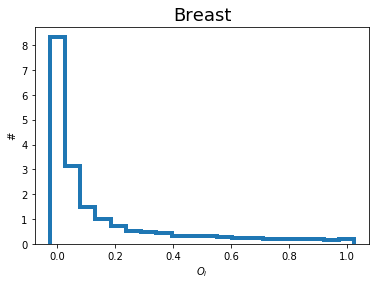

In [23]:
bins = 20
rang = (0-0.5/20,1+0.5/20)
fig = plt.figure()
plt.hist(np.array(O)/300., histtype='step', lw=4, density=True, bins=bins, range=rang)
plt.title(tissue, fontsize=18)
plt.xlabel('$O_i$')
plt.ylabel('#')
plt.show()
fig.savefig("U_%s.png"%tissue)

In [24]:
O_tissues = {}
for tissue in samples['primary_site'].unique():
    print(tissue)
    sample_list = np.concatenate((['gene'],samples[samples['primary_site']==tissue].index.values))
    subdf = df.loc[:,sample_list]
    subdf.set_index('gene', inplace=True)
    O = []
    for g in subdf.index.values:
        O.append(len([fpkm for fpkm in subdf.loc[g].values if fpkm > 1e-1]))
    O_tissues[tissue] = O

Stomach
Cervix uteri
Kidney
Brain
Breast
Rectum
Thymus
Esophagus
Liver and intrahepatic bile ducts
Other and unspecified parts of tongue
Skin
Larynx
Colon
Connective, subcutaneous and other soft tissues
Testis
Bronchus and lung
Bladder
Prostate gland
Corpus uteri
Thyroid gland
Other and ill-defined sites in lip, oral cavity and pharynx
Adrenal gland
Ovary
Retroperitoneum and peritoneum
Uterus, NOS
Eye and adnexa
Blood
Gum
Other and unspecified parts of biliary tract
Rectosigmoid junction
Small intestine
Other and unspecified parts of mouth
Heart, mediastinum, and pleura
Spinal cord, cranial nerves, and other parts of central nervous system
Hypopharynx
Pancreas
Oropharynx
Tonsil
Palate
Floor of mouth
Other endocrine glands and related structures
Other and unspecified male genital organs
Lymph nodes
Base of tongue
Other and ill-defined sites
Peripheral nerves and autonomic nervous system
Lip
Bones, joints and articular cartilage of limbs
Unknown
Meninges
Bones, joints and articular carti

/Users/filippo/anaconda3/envs/thesis/lib/python2.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [25]:
df_files = pd.DataFrame(data=O_tissues)
df_files.to_csv("tissues.csv", header=True, index=False)

In [5]:
#df_files = pd.read_csv("tissues.csv")
#O_tissues = {}
#for tissue in df.columns:
#    O_tissues[tissue]=df.loc[:,tissue].values

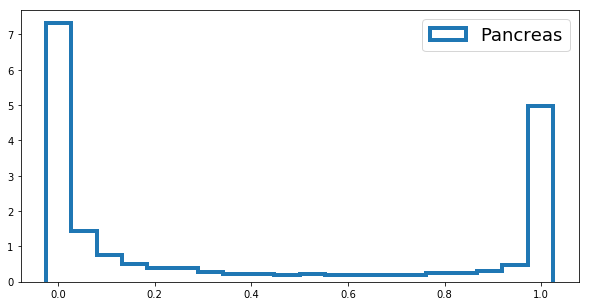

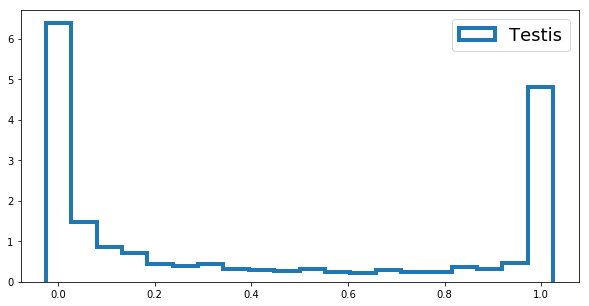

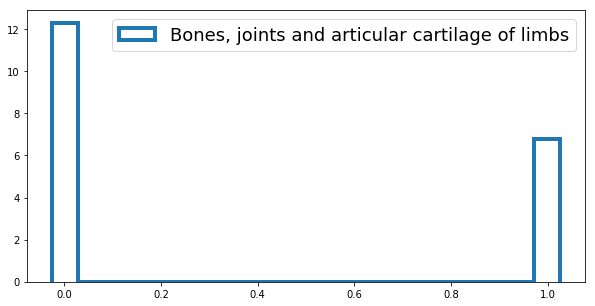

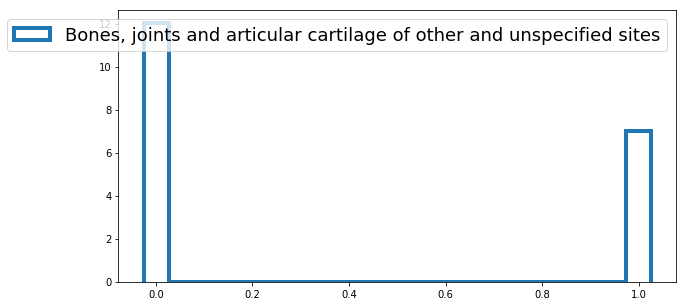

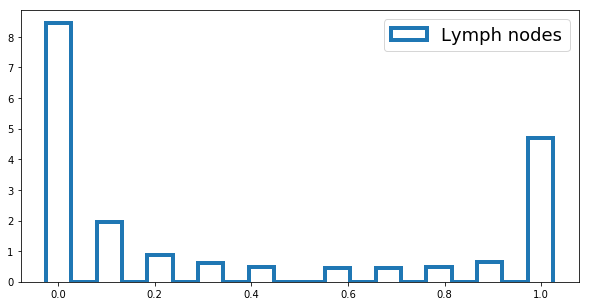

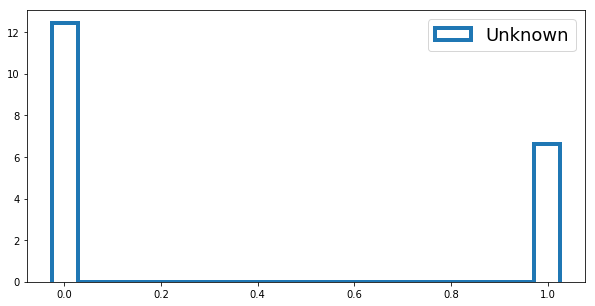

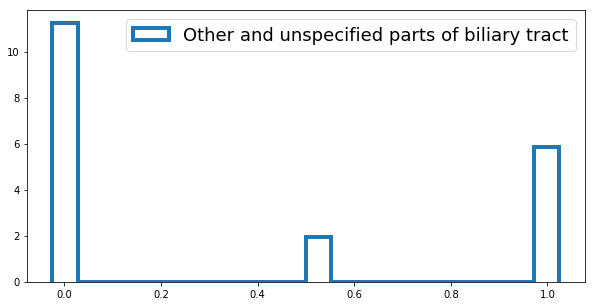

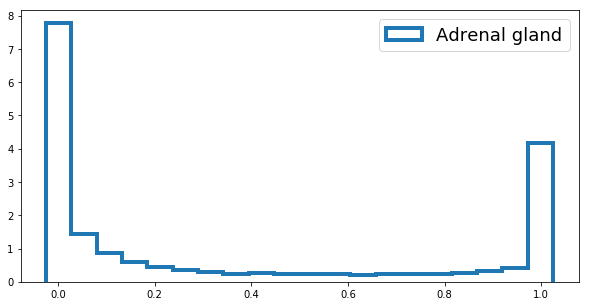

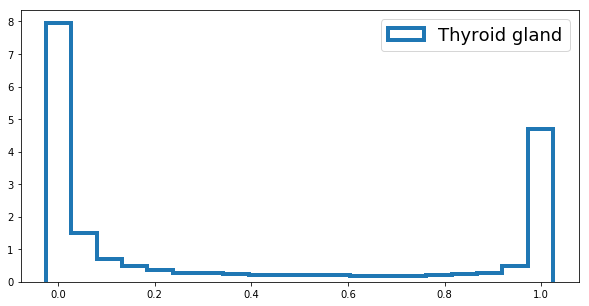

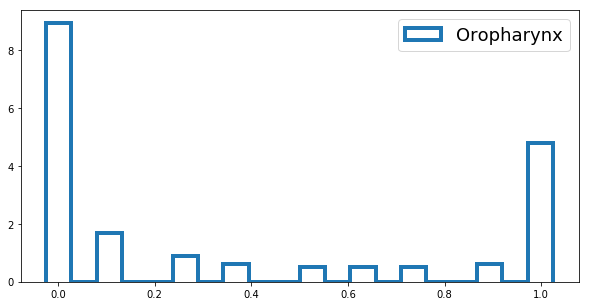

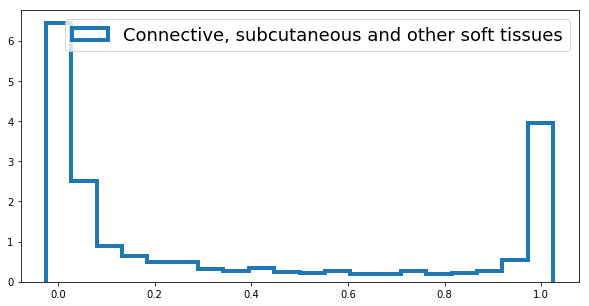

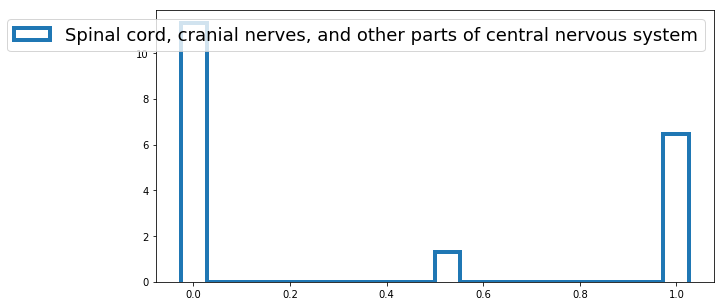

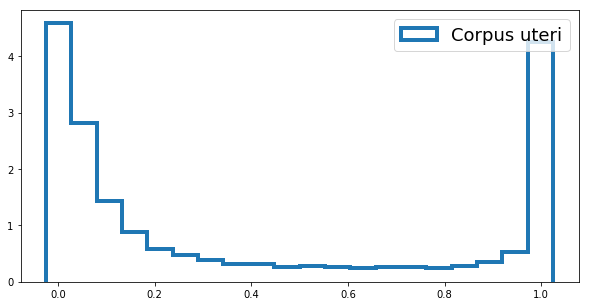

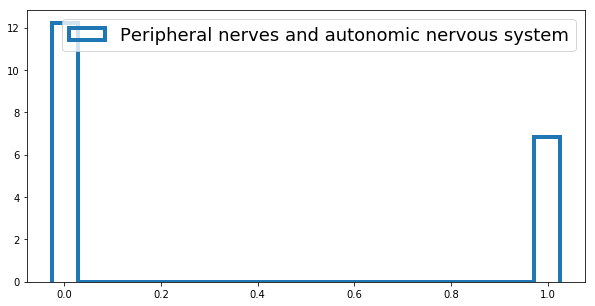

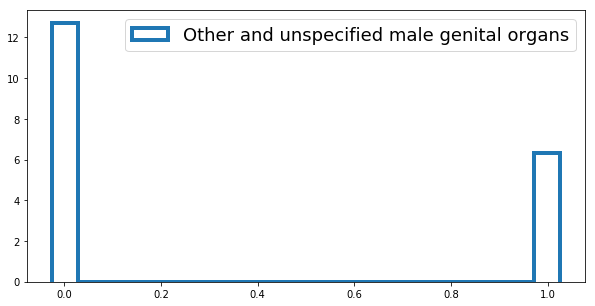

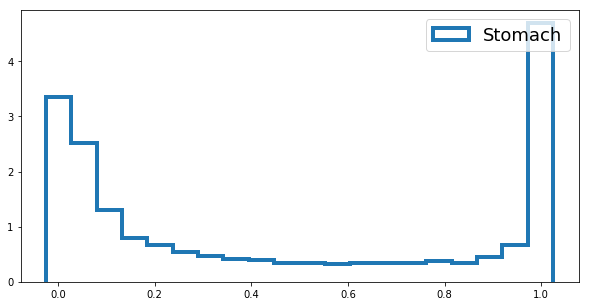

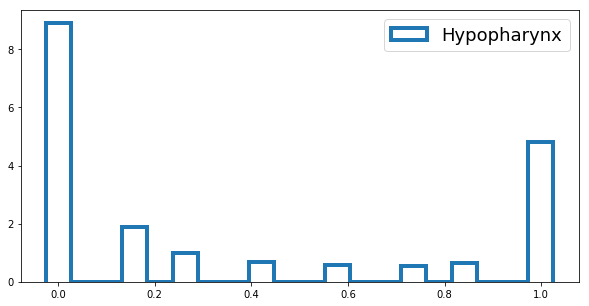

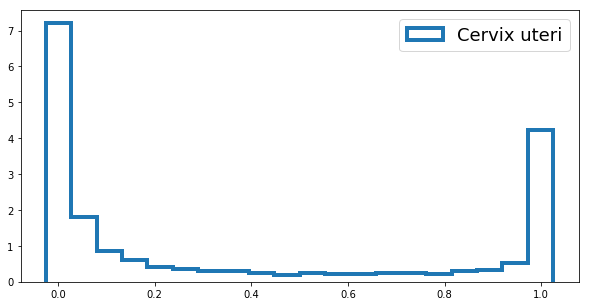

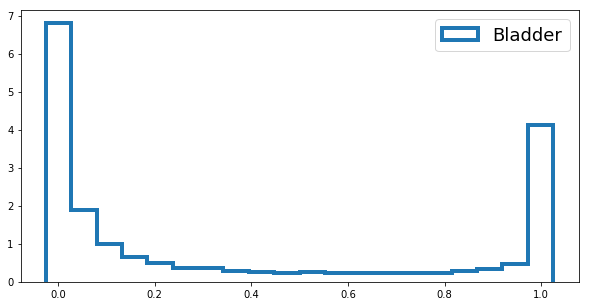

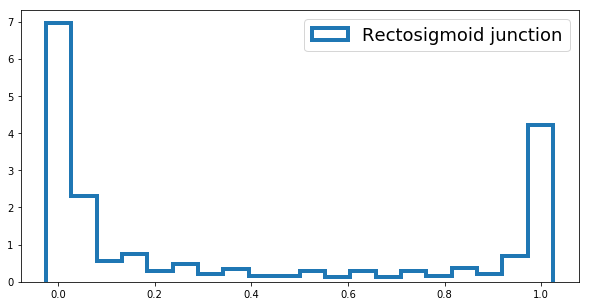

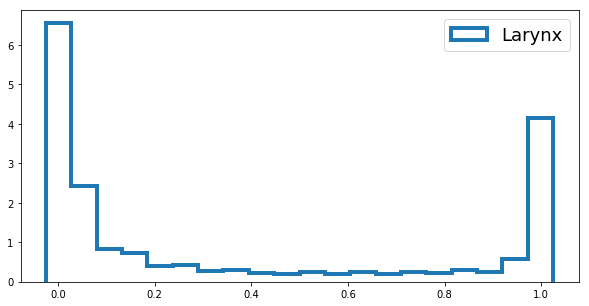

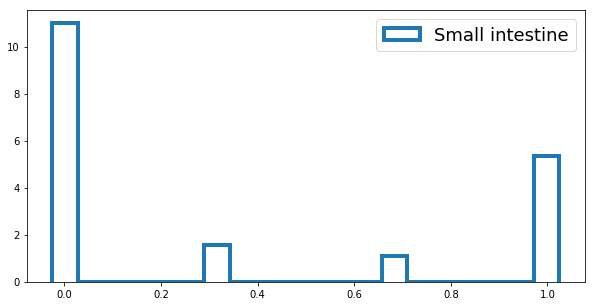

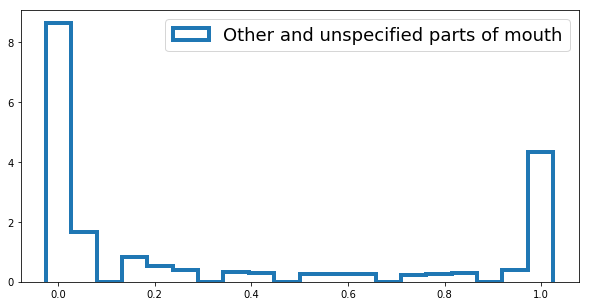

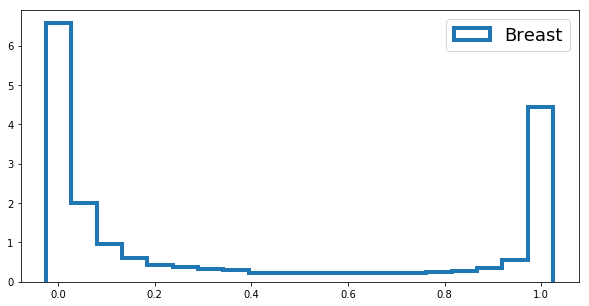

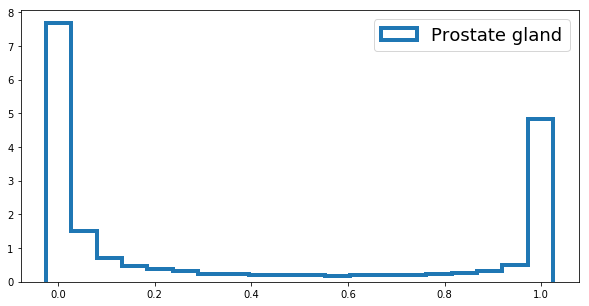

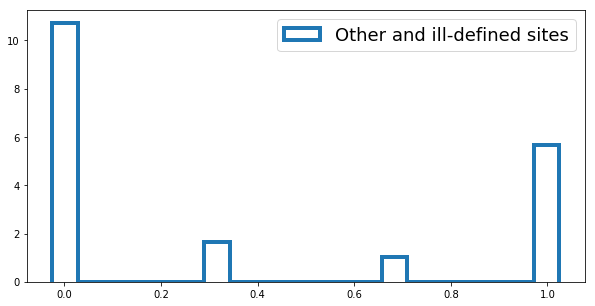

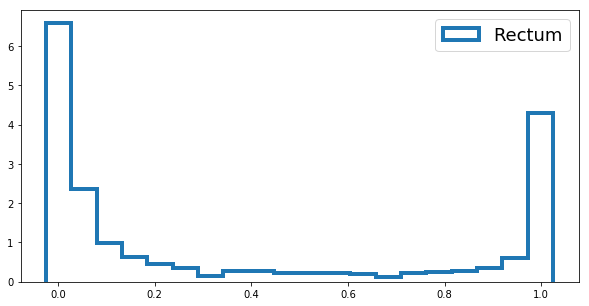

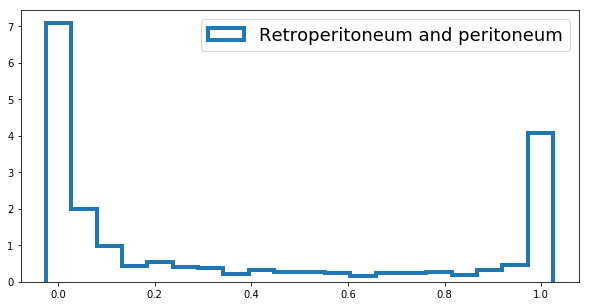

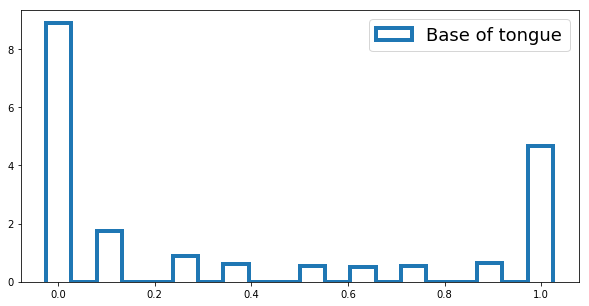

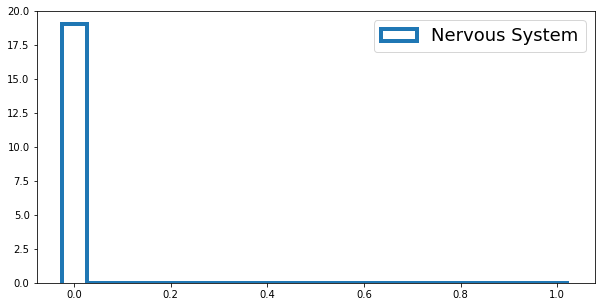

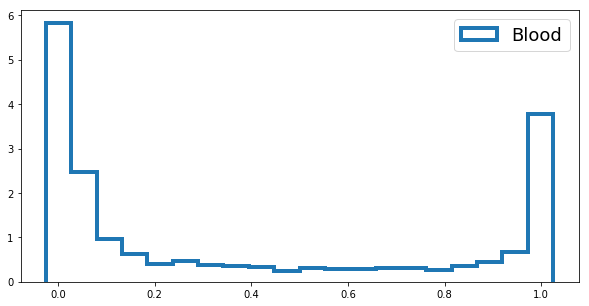

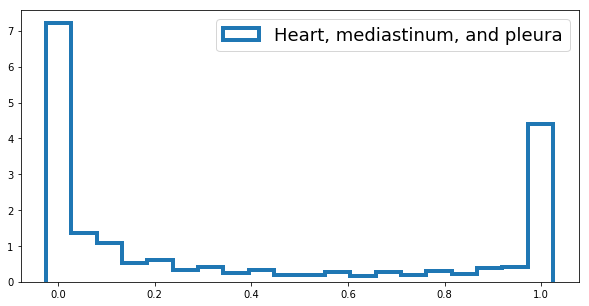

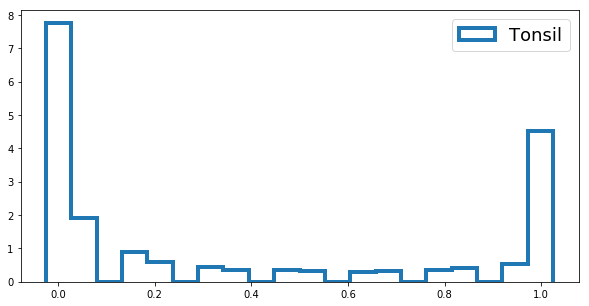

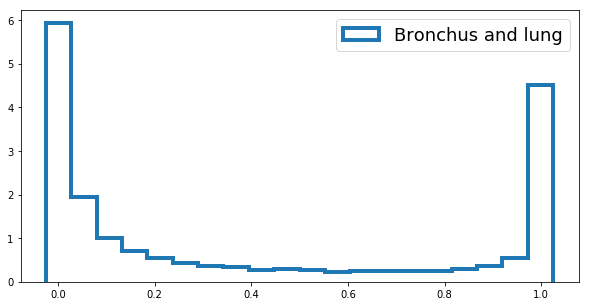

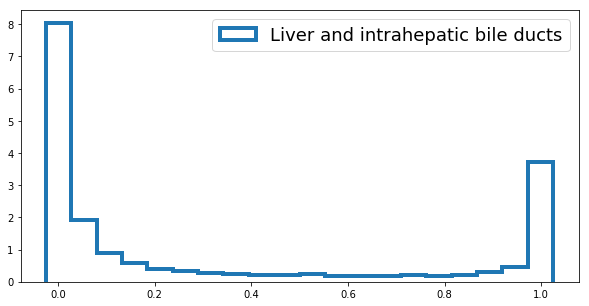

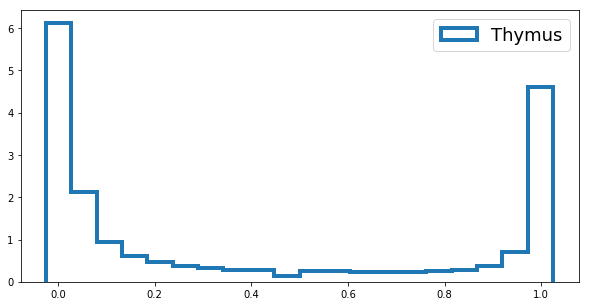

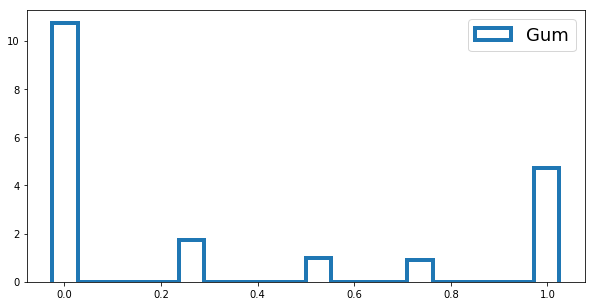

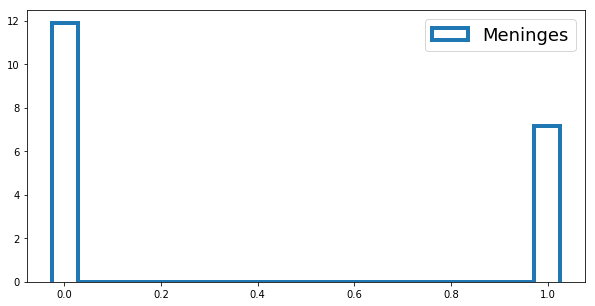

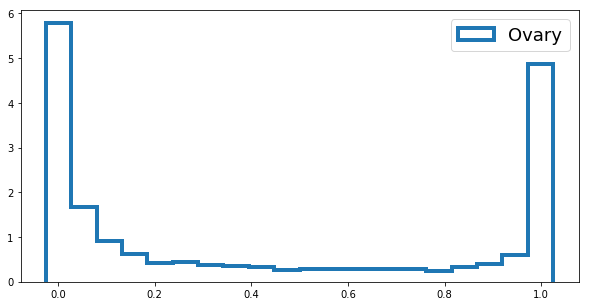

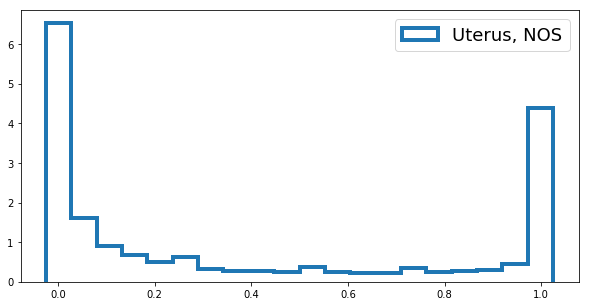

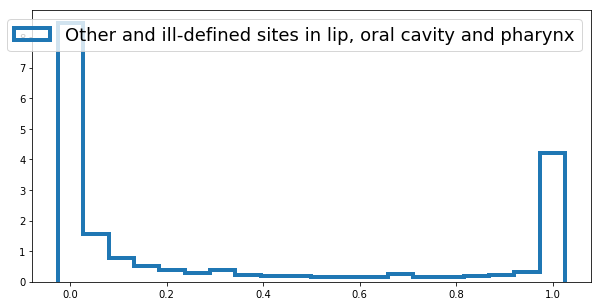

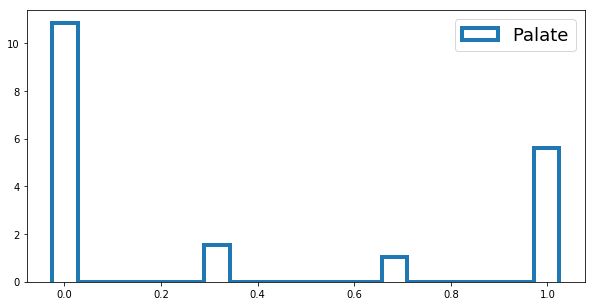

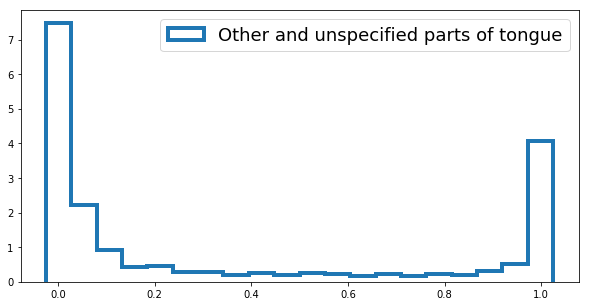

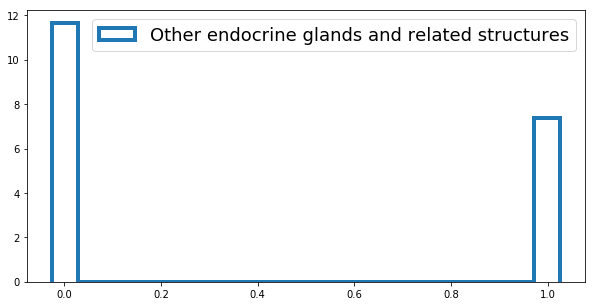

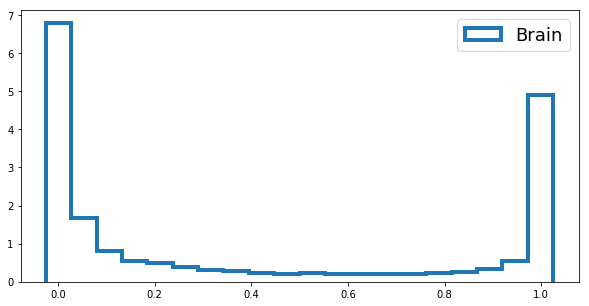

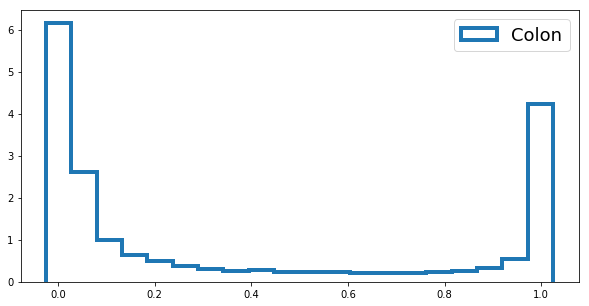

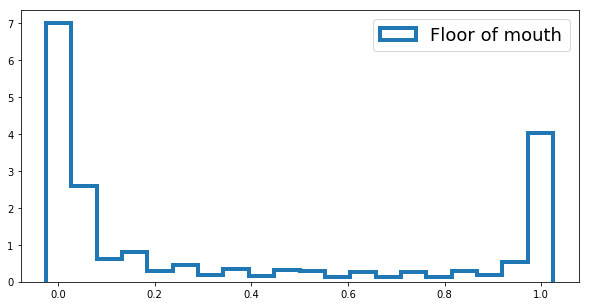

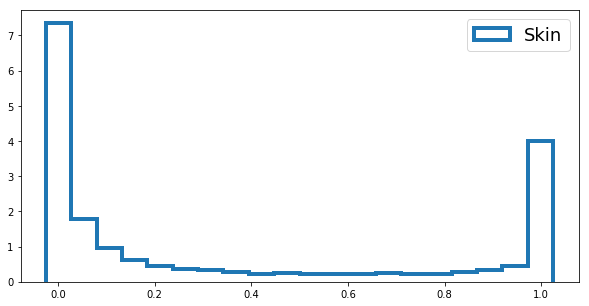

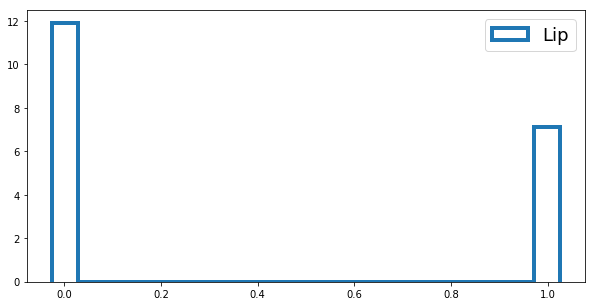

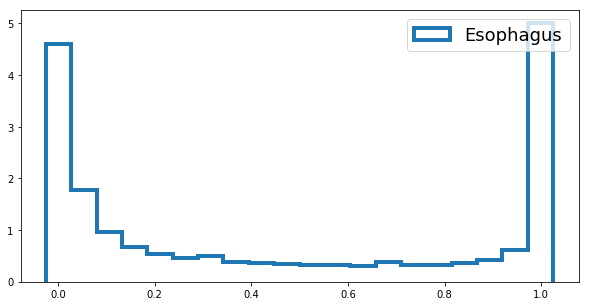

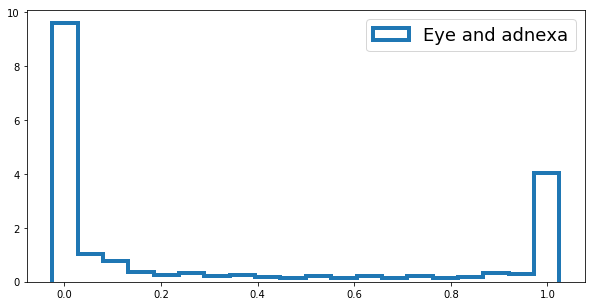

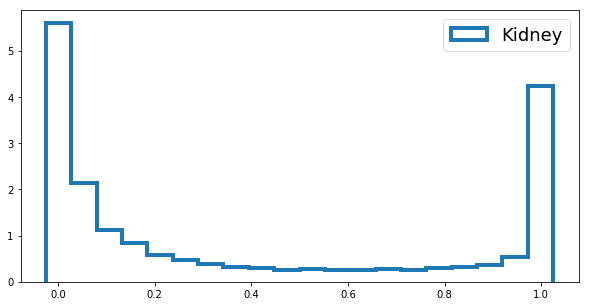

In [26]:
bins = 20
rang = (0-0.5/20,1+0.5/20)
for tissue in O_tissues:
    fig=plt.figure(figsize=(10,5))
    ax = fig.subplots(1)
    data = O_tissues[tissue]
    lendata = len(samples[samples['primary_site']==tissue])
    ax.hist(np.array(data, dtype=float)/float(lendata), histtype='step', lw=4, density=True, bins=bins, range=rang, label=tissue)
    ax.legend(fontsize=18)
    fig.savefig("U_%s.png"%tissue)

## Single gene distr

In [27]:
from tableanalyzer import geneinfo, genedistr

name: ENSG00000221782
FPKM mean:       3.81
FPKM var:     253.31


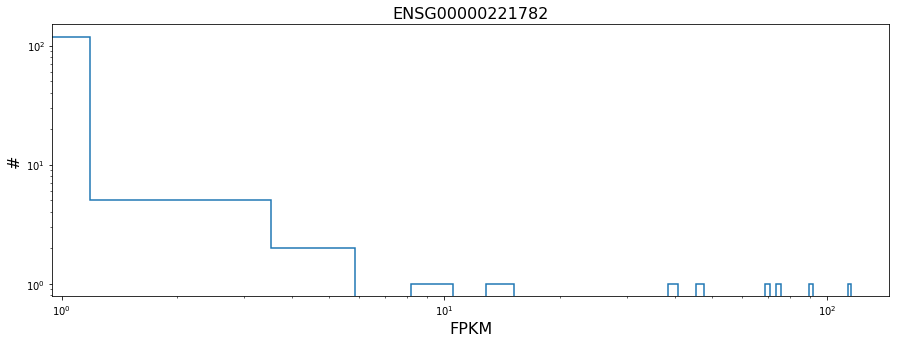

In [34]:
gene = geneinfo('ENSG00000221782', df, 5000)
genedistr(gene, 50)

name: ENSG00000221782
FPKM mean:       0.31
FPKM var:       0.15


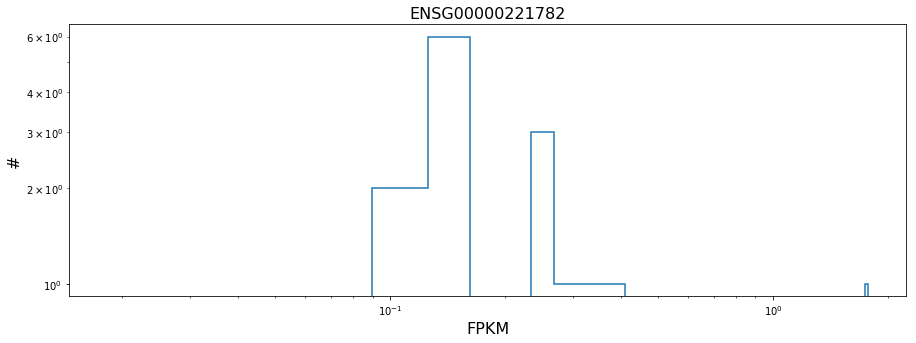

In [42]:
tissue='Kidney'
sample_list = np.concatenate((['gene'],samples[samples['primary_site']==tissue].index.values))
subdf = df.loc[:,sample_list]
#subdf.set_index('gene', inplace=True)
gene = geneinfo('ENSG00000221782', subdf, len(sample_list)-1)
genedistr(gene, 50)